In [1]:
import tensorflow as tf
from tensorflow import keras
import time
from sklearn.metrics import confusion_matrix
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#It is easier to use dataset from keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

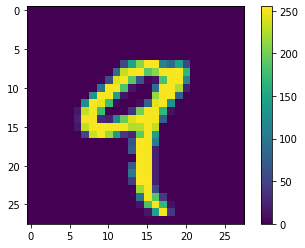

In [3]:
#Let's see if the image is looking right
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
num_classes = 10
test_labels_notCategorical = test_labels
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [5]:
#Normalize images' pixel densities
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
input_Layer = keras.layers.Flatten(input_shape=(28, 28))
hidden_layer = keras.layers.Dense(100, activation='relu')
output_layer = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([input_Layer, hidden_layer, output_layer])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.compile(keras.optimizers.SGD(learning_rate=0.1, momentum=0, nesterov=False),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [8]:
tic = time.clock()
model.fit(train_images, train_labels, epochs=10)
toc = time.clock()

C:\Users\suuser\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3036 - acc: 0.9133
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1478 - acc: 0.9577
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1071 - acc: 0.9691
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0852 - acc: 0.9747
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0693 - acc: 0.9802
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0595 - acc: 0.9826
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0510 - acc: 0.9851
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0449 - acc: 0.9872
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0385 - acc: 0.9894
Epoch 10/10
60000/60000 [==============================] - 

C:\Users\suuser\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
time_elapsed = toc - tic
time_elapsed

48.6835246

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.0777 - acc: 0.9767

Test accuracy: 0.9767


In [11]:
test_predictions = model.predict(test_images)

In [12]:
test_predictions= np.argmax(test_predictions, axis=1)

In [16]:
CM = confusion_matrix(test_labels_notCategorical, test_predictions)
CM

array([[ 970,    1,    0,    2,    2,    0,    1,    2,    1,    1],
       [   0, 1120,    3,    3,    0,    1,    3,    0,    5,    0],
       [   3,    1, 1000,   11,    4,    0,    0,    6,    7,    0],
       [   0,    0,    1, 1003,    0,    0,    0,    1,    4,    1],
       [   2,    0,    6,    1,  955,    0,    2,    3,    2,   11],
       [   3,    0,    0,   17,    2,  860,    5,    0,    5,    0],
       [   4,    3,    2,    1,    5,    5,  936,    0,    2,    0],
       [   1,    2,    7,    6,    0,    0,    0, 1001,    3,    8],
       [   3,    0,    4,    7,    2,    2,    1,    3,  950,    2],
       [   4,    4,    0,    9,    7,    3,    0,    5,    5,  972]],
      dtype=int64)

In [14]:
weights = hidden_layer.get_weights()
W_hidden = weights[0].reshape(28,28,-1)
W_hidden.shape

(28, 28, 100)

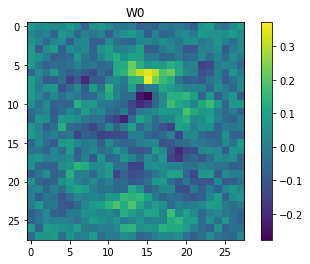

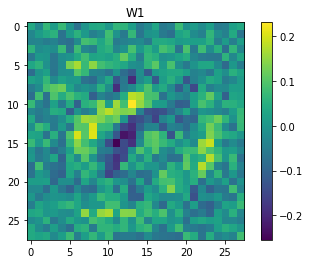

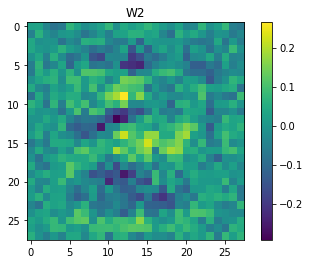

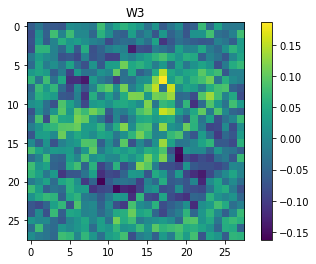

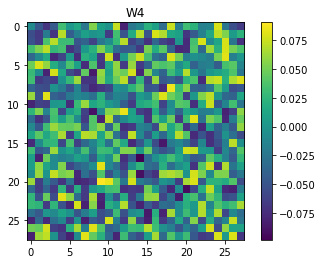

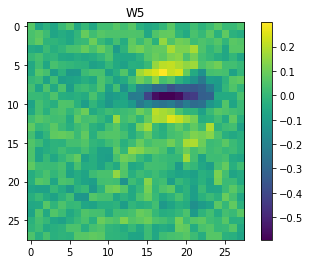

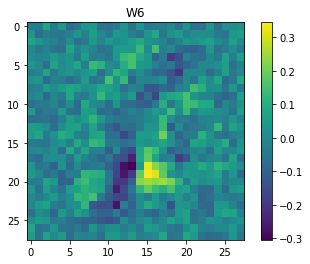

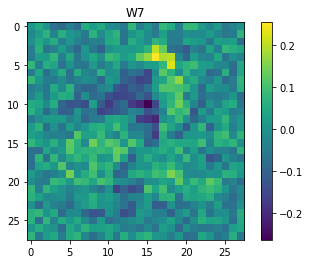

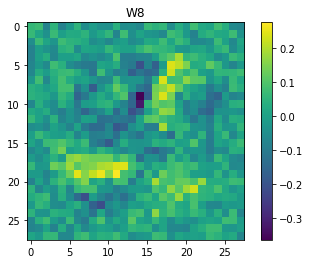

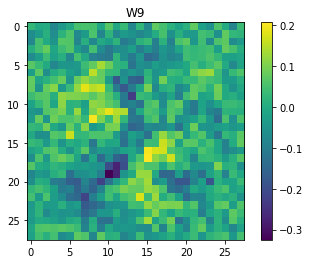

In [15]:
#Display the hidden unit weights (as a 28x28 image) for some 10 nodes
plt.figure()
for i in range(0,10):  
    plt.imshow(W_hidden[:,:,i])
    plt.colorbar()
    plt.grid(False)
    plt.title("W"+str(i))
    plt.show()